In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [219]:
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/12mix/12mix.csv')
# df = pd.read_excel('/Users/bryan/Studio/seq_bank/mix100.xlsx')
# df = pd.read_excel('/Users/bryan/Studio/seq_bank/data/merge/mix_19_20_21_201_202_203_204_205_206_207.xlsx')
df = pd.read_csv('/Users/bryan/Studio/seq/data/merges/df_19_20_21.csv')

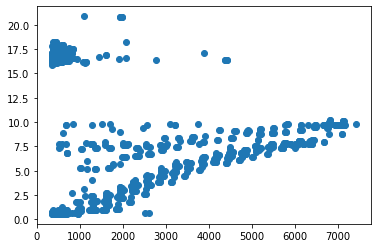

In [220]:
plt.scatter(df.Mass, df.RT)

In [221]:
df_6k = df[df.Mass > 6000]

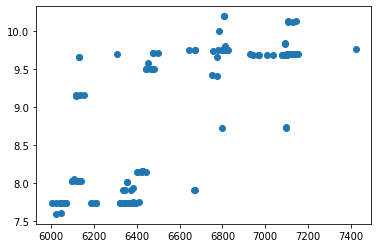

In [222]:
plt.scatter(df_6k.Mass, df_6k.RT)

In [223]:
df_6k = df_6k.sort_values('Vol', ascending=False)

In [224]:
df_condidates = df_6k[df_6k.Vol > 5E6]

In [225]:
df_condidates.index

Int64Index([1, 510, 2, 511], dtype='int64')

In [226]:
df_condidates.shape

(4, 4)

In [227]:
x = y = df_condidates.Mass

In [228]:
x = np.array(x)
y = np.array(y)

In [229]:
x, y

(array([6781.0413, 7079.0519, 6024.8481, 6322.8565]),
 array([6781.0413, 7079.0519, 6024.8481, 6322.8565]))

In [247]:
TAG = 694.2397
MASS_P = 79.96633
MASS_H2O = 18.0106
MASS_DIFF = TAG + MASS_P - MASS_H2O 

In [231]:
np_ppm = np.abs((x[:, np.newaxis] - y - MASS_DIFF))# * 1E6 / MASS_DIFF

In [232]:
np_ppm[np_ppm < 0.1]

array([2.23000000e-03, 2.99999995e-05])

In [233]:
df_ppm = pd.DataFrame(np_ppm)
df_ppm = df_ppm[df_ppm < 0.1]
# df_ppm.notnull().stack().index

In [234]:
idx_pairs = list(df_ppm[df_ppm.notnull()].stack().index)
df3_idxs = [pair[0] for pair in idx_pairs]
df5_idxs = [pair[1] for pair in idx_pairs]
print(len(df3_idxs), len(df5_idxs))
df3_idxs = list(set(df3_idxs))
df5_idxs = list(set(df5_idxs))

2 2


In [235]:
end_masses_3p = df_condidates.iloc[df3_idxs]['Mass'].sort_values()

In [236]:
end_masses_3p

1      6781.0413
510    7079.0519
Name: Mass, dtype: float64

In [237]:
df_condidates.iloc[df5_idxs]['Mass'].sort_values()

2      6024.8481
511    6322.8565
Name: Mass, dtype: float64

# Final Version

In [248]:
def endpoints(df, mass_diff=MASS_DIFF, min_mass=6000, min_vol=5E6):
    df_top = df[(df.Mass > min_mass) & (df.Vol > min_vol)]
    print("Input shape {} filtered shape {} by min mass {} and min Vol {}".format(df.shape, df_top.shape, min_mass, min_vol))
    
    x = y = np.array(df_top.Mass)
    np_ppm = np.abs((x[:, np.newaxis] - y - mass_diff))
    df_ppm = pd.DataFrame(np_ppm)
    df_ppm = df_ppm[df_ppm < 0.1]
    
    idx_pairs = list(df_ppm[df_ppm.notnull()].stack().index)
    df3_idxs = [pair[0] for pair in idx_pairs]
    df5_idxs = [pair[1] for pair in idx_pairs]
    df3_idxs = list(set(df3_idxs))
    df5_idxs = list(set(df5_idxs))
    print("found 3' ladder ends {} 5' ladder ends {}".format(len(df3_idxs), len(df5_idxs)))
    return df_top.iloc[df3_idxs].sort_values('Mass'), df_top.iloc[df5_idxs].sort_values('Mass')

In [239]:
features = ['Mass', 'RT', 'Vol'] #, 'Quality Score'

In [240]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/merges/df_19_20.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (1109, 4) filtered shape (4, 4) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 2 5' ladder ends 2


(          Mass     RT       Vol
 1    6781.0413  9.752  16819442
 510  7079.0519  9.695  15887400,
           Mass     RT       Vol
 2    6024.8481  7.743  13740135
 511  6322.8565  7.741  13695730)

In [250]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/merges/df_19_20_21_201_202_203_204.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (10877, 6) filtered shape (22, 6) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 9 5' ladder ends 9


(           Mass      RT       Vol
 1     6781.0413   9.752  16819442
 9131  6954.9496   9.252  19518152
 4046  6985.0207  11.625  58498820
 4034  7022.9624  11.628  13913092
 6309  7073.0472  12.156  82887552
 510   7079.0519   9.695  15887400
 2631  7088.0481   9.912  20041130
 2621  7125.9965   9.914   5117104
 1324  7522.0727   9.677  10294695,
            Mass      RT       Vol
 2     6024.8481   7.743  13740135
 9322  6198.7584   7.239  28722032
 4094  6228.8290   9.631  76824144
 4085  6266.7697   9.635  13504408
 6354  6316.8541  10.330  72694952
 511   6322.8565   7.741  13695730
 2817  6331.8575   8.134  27714554
 2804  6369.8036   8.136  10346698
 1445  6765.8739   7.858   8310886)

In [249]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/merges/df_19_20_21_201_202.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (6282, 6) filtered shape (16, 6) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 7 5' ladder ends 7


(           Mass      RT       Vol
 1     6781.0413   9.752  16819442
 4046  6985.0207  11.625  58498820
 4034  7022.9624  11.628  13913092
 510   7079.0519   9.695  15887400
 2631  7088.0481   9.912  20041130
 2621  7125.9965   9.914   5117104
 1324  7522.0727   9.677  10294695,
            Mass     RT       Vol
 2     6024.8481  7.743  13740135
 4094  6228.8290  9.631  76824144
 4085  6266.7697  9.635  13504408
 511   6322.8565  7.741  13695730
 2817  6331.8575  8.134  27714554
 2804  6369.8036  8.136  10346698
 1445  6765.8739  7.858   8310886)

In [202]:
df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/5mix.xlsx')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (5962, 26) filtered shape (17, 26) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 7 5' ladder ends 7


(          Mass     RT       Vol
 309  6781.0426  9.576  35286012
 273  6818.9862  9.591   7577704
 195  6954.9478  9.243  16978916
 147  7079.0513  9.529  34343980
 145  7088.0479  9.902  18422776
 112  7116.9915  9.524   8698739
 47   7522.0681  9.519  21361914,
           Mass     RT       Vol
 650  6024.8498  7.575  32082504
 625  6062.7960  7.566   7275172
 537  6198.7590  7.218  22736186
 482  6322.8563  7.608  31174514
 475  6331.8589  8.116  24863660
 445  6360.8068  7.618  11065491
 314  6765.8759  7.715  20532520)

In [203]:
df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/12mix/12mix.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (4177, 26) filtered shape (27, 26) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 12 5' ladder ends 12


(          Mass      RT       Vol
 12   6781.0487  11.774  28249250
 25   6954.9524  11.345  17940340
 6    6985.0192  11.596  36982456
 4    7073.0393  12.104  42531824
 8    7079.0599  11.729  35588908
 31   7088.0531  12.205   8321166
 9    7088.0576  11.861  34051628
 22   7110.0607  11.512  19469152
 5    7151.0890  12.279  37600404
 18   7193.0263  11.782  21564316
 15   7522.0756  11.851  25635358
 23  10283.4738  12.301  19203606,
          Mass      RT       Vol
 11  6024.8560   9.786  28678592
 20  6198.7617   9.274  20338994
 3   6228.8264   9.615  43142020
 7   6316.8515  10.303  35823888
 10  6322.8656   9.812  32831604
 19  6331.8620  10.422  21101738
 24  6331.8625   9.997  17998786
 0   6353.8724   9.511  65561736
 1   6394.9003  10.446  47741592
 2   6436.8377   9.702  44142560
 13  6765.8819  10.040  28026282
 17  9527.2806  10.994  22201768)

In [204]:
df_19 = pd.read_csv('/Users/bryan/Studio/seq/data/samples/19.csv')
endpoints_3p, endpoints_5p = endpoints(df_19)
endpoints_3p[features], endpoints_5p[features]

Input shape (509, 27) filtered shape (2, 27) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 1 5' ladder ends 1


(        Mass     RT       Vol
 1  6781.0413  9.752  16819442,
         Mass     RT       Vol
 2  6024.8481  7.743  13740135)

In [205]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/samples/20.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (600, 26) filtered shape (2, 26) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 1 5' ladder ends 1


(        Mass     RT       Vol
 1  7079.0519  9.695  15887400,
         Mass     RT       Vol
 2  6322.8565  7.741  13695730)

In [206]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/samples/21.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (796, 26) filtered shape (2, 26) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 1 5' ladder ends 1


(          Mass     RT       Vol
 215  7522.0727  9.677  10294695,
           Mass     RT      Vol
 336  6765.8739  7.858  8310886)

In [207]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/samples/201.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (2114, 26) filtered shape (4, 26) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 2 5' ladder ends 2


(          Mass     RT       Vol
 726  7088.0481  9.912  20041130
 716  7125.9965  9.914   5117104,
           Mass     RT       Vol
 912  6331.8575  8.134  27714554
 899  6369.8036  8.136  10346698)

In [208]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/samples/202.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (2263, 26) filtered shape (6, 26) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 2 5' ladder ends 2


(         Mass      RT       Vol
 27  6985.0207  11.625  58498820
 15  7022.9624  11.628  13913092,
          Mass     RT       Vol
 75  6228.8290  9.631  76824144
 66  6266.7697  9.635  13504408)

In [209]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/samples/203.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (2068, 26) filtered shape (3, 26) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 1 5' ladder ends 1


(         Mass      RT       Vol
 27  7073.0472  12.156  82887552,
          Mass     RT       Vol
 72  6316.8541  10.33  72694952)

In [210]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/samples/204.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (2527, 26) filtered shape (3, 26) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 1 5' ladder ends 1


(          Mass     RT       Vol
 781  6954.9496  9.252  19518152,
           Mass     RT       Vol
 972  6198.7584  7.239  28722032)

In [211]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/samples/205.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (1695, 26) filtered shape (6, 26) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 1 5' ladder ends 3


(         Mass     RT       Vol
 30  7110.0622  11.55  40533036,
          Mass     RT        Vol
 67  6353.8616  9.342    7172262
 66  6353.8690  9.582    8352953
 65  6353.8728  9.539  114873784)

In [212]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/samples/206.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (1991, 26) filtered shape (6, 26) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 2 5' ladder ends 2


(         Mass      RT       Vol
 26  7151.0928  12.317  87850496
 16  7173.0738  12.316   7182505,
          Mass      RT       Vol
 72  6394.9004  10.463  98203984
 64  6416.8842  10.465   8175817)

In [213]:
df = pd.read_csv('/Users/bryan/Studio/seq/data/samples/207.csv')
endpoints_3p, endpoints_5p = endpoints(df)
endpoints_3p[features], endpoints_5p[features]

Input shape (2099, 26) filtered shape (3, 26) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 1 5' ladder ends 1


(         Mass      RT       Vol
 23  7193.0274  11.807  55442324,
          Mass     RT       Vol
 53  6436.8358  9.723  97470984)

In [214]:
TAG2 = 826.3184
MASS_DIFF2 = TAG2 + MASS_P - MASS_H2O 

In [215]:
df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/200313/200313s15_100.xls')
endpoints_3p, endpoints_5p = endpoints(df, mass_diff=MASS_DIFF2)
endpoints_3p[features], endpoints_5p[features]

WARNING *** file size (1367657) not 512 + multiple of sector size (512)
Input shape (4418, 34) filtered shape (140, 34) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 18 5' ladder ends 14


(           Mass      RT        Vol
 3933  7234.2036  44.742  516314176
 3950  7272.1440  44.748   60623840
 3894  7283.1908  44.643   49167280
 4018  7283.2023  45.116  679215104
 4015  7283.2414  45.112  142628176
 3865  7321.1150  44.572    5152310
 4039  7321.1448  45.129    5333626
 4064  7321.1607  45.158  118470768
 3546  8486.5389  43.086   11372876
 3616  8832.3874  43.194  202790480
 4123  9501.5105  45.606  175306416
 4129  9502.4432  45.611   28370734
 4127  9520.4230  45.608    7241582
 4145  9523.4497  45.624   16116858
 4151  9535.8739  45.628    5462881
 4154  9538.4254  45.630   21694646
 4159  9539.4269  45.636   62517200
 4173  9577.4086  45.672   10013182,
            Mass      RT       Vol
 2128  6345.9106  32.776  53080896
 2134  6383.8586  32.782  21964912
 2210  6394.9312  33.101  22360434
 2213  6432.8638  33.103   9371245
 3730  7598.2070  43.540   5357591
 2177  7944.0873  32.916   7893797
 2442  8613.1948  36.446  83198312
 2445  8614.1631  36.446  10969808


In [216]:
df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/200313/200313s09_100.xls')
endpoints_3p, endpoints_5p = endpoints(df, mass_diff=MASS_DIFF2)
endpoints_3p[features], endpoints_5p[features]

WARNING *** file size (1301349) not 512 + multiple of sector size (512)
Input shape (4203, 34) filtered shape (65, 34) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 3 5' ladder ends 2


(           Mass      RT        Vol
 3505  8832.4031  43.316  411847712
 3650  8870.3379  44.935    5469421
 3539  8870.3476  43.342   54310616,
            Mass      RT       Vol
 2440  7944.0958  32.904  17199908
 2443  7982.0351  32.909   8141388)

In [217]:
df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/200313/200313s10_100.xls')
endpoints_3p, endpoints_5p = endpoints(df, mass_diff=MASS_DIFF2)
endpoints_3p[features], endpoints_5p[features]

WARNING *** file size (773597) not 512 + multiple of sector size (512)
Input shape (2492, 34) filtered shape (68, 34) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 8 5' ladder ends 8


(           Mass      RT        Vol
 2113  9501.5099  45.571  423222720
 2123  9519.4169  45.576   15555447
 2146  9538.4666  45.593   34026892
 2139  9539.4580  45.589  173487328
 2125  9557.4385  45.577   18404696
 2162  9575.4360  45.615   30558106
 2161  9576.4114  45.612   18177506
 2176  9614.3798  45.738    5209423,
            Mass      RT        Vol
 1547  8613.2281  36.378  167130240
 1560  8631.1435  36.387   25312116
 1587  8650.1575  36.416   19960552
 1569  8651.1729  36.398   83240888
 1575  8669.1376  36.404   10938546
 1612  8687.0938  36.445   13259181
 1613  8688.1107  36.446   25877780
 1625  8726.1094  36.511    6218524)

In [218]:
df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/200313/200313s12_100.xls')
endpoints_3p, endpoints_5p = endpoints(df, mass_diff=MASS_DIFF2)
endpoints_3p[features], endpoints_5p[features]

WARNING *** file size (499895) not 512 + multiple of sector size (512)
Input shape (1604, 34) filtered shape (42, 34) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 4 5' ladder ends 5


(           Mass      RT        Vol
 1309  7234.1970  44.696  956124480
 1335  7256.1775  44.710   80115584
 1351  7272.1533  44.726  226115648
 1372  7310.0967  44.814   20804940,
           Mass      RT       Vol
 786  6345.9117  32.143   5690196
 796  6345.9156  32.731  77148472
 800  6367.8879  32.734  12917306
 802  6383.8606  32.737  52855904
 817  6421.8048  32.757  15123419)

In [192]:
df.columns

Index(['Cpd', 'Mass', 'Avg Mass', 'RT', 'Vol', 'Quality Score', 'm/z',
       'Show/Hide', 'Label', 'Std Dev', 'Base Peak', 'Polarity', 'Max Z',
       'Min Z', 'Start', 'End', 'Height', 'Width', 'Vol %', 'Ions', 'Z Count',
       'Saturated', 'Group', 'Cpds/Group', 'File', 'Algorithm'],
      dtype='object')